In [2]:
import cv2
import numpy as np
import pytesseract

# Configure pytesseract
pytesseract.pytesseract.tesseract_cmd = "/home/akash/miniconda3/envs/hi_sam/bin/tesseract"


In [ ]:
#NOTE:Giving black word pixels
# # Load the image
# image_path = '/home/akash/ws/dataset/ST/BharatST/YOLODataset/images/val/I_image_539.jpg'
# image = cv2.imread(image_path)

# # Read annotations from the text file
# annotations_file = '/home/akash/ws/dataset/ST/BharatST/YOLODataset/labels/val/I_image_539.txt'
# annotations = []

# with open(annotations_file, 'r') as file:
#     for line in file.readlines():
#         # Split the line into individual values
#         parts = line.strip().split()
#         coords = list(map(float, parts[1:]))  # Convert coordinates to float
#         annotations.append(coords)

# # Convert annotations to pixel coordinates
# height, width, _ = image.shape
# polygons = []
# for annotation in annotations:
#     # Each annotation consists of 8 values (4 points, each with x and y)
#     polygon = []
#     for i in range(0, len(annotation), 2):
#         x = int(annotation[i] * width)
#         y = int(annotation[i + 1] * height)
#         polygon.append((x, y))
#     polygons.append(polygon)

# # Create a mask for the annotated regions
# mask = np.zeros((height, width), dtype=np.uint8)
# for polygon in polygons:
#     polygon_np = np.array(polygon, np.int32).reshape((-1, 1, 2))
#     cv2.fillPoly(mask, [polygon_np], color=255)

# # Grayscale the image
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply thresholding
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# # Morphological operations to remove noise
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
# opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# # Mask the annotated regions
# inverted_opening = cv2.bitwise_and(255 - opening, mask)

# # Extract words in white pixels
# # Retain only white pixels (words) in the annotated regions
# words_only = cv2.bitwise_and(opening, mask)

# # Save and visualize the result
# cv2.imwrite('words_only.png', words_only)

# # Optional: Perform text extraction on the result
# # data = pytesseract.image_to_string(words_only, lang='eng', config='--psm 6')
# # print("Extracted Text:\n", data)


True

In [25]:
import cv2
import numpy as np

# Load the image
image_path = '/home/akash/ws/dataset/ST/BharatST/YOLODataset/images/val/L_image_650.jpg'
image = cv2.imread(image_path)

# Read annotations from the text file
annotations_file = '/home/akash/ws/dataset/ST/BharatST/YOLODataset/labels/val/L_image_650.txt'
annotations = []

with open(annotations_file, 'r') as file:
    for line in file.readlines():
        # Split the line into individual values
        parts = line.strip().split()
        coords = list(map(float, parts[1:]))  # Convert coordinates to float
        annotations.append(coords)

# Convert annotations to pixel coordinates
height, width, _ = image.shape
polygons = []
for annotation in annotations:
    # Each annotation consists of 8 values (4 points, each with x and y)
    polygon = []
    for i in range(0, len(annotation), 2):
        x = int(annotation[i] * width)
        y = int(annotation[i + 1] * height)
        polygon.append((x, y))
    polygons.append(polygon)

# Create a mask for the annotated regions
mask = np.zeros((height, width), dtype=np.uint8)
for polygon in polygons:
    polygon_np = np.array(polygon, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(mask, [polygon_np], color=255)

# Grayscale the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morphological operations to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# --- Modified part ---
# Invert the thresholded image to get white characters on black background
inverted_thresh = cv2.bitwise_not(thresh)

# Mask the annotated regions on the inverted thresholded image
words_only = cv2.bitwise_and(inverted_thresh, mask)
# --- End of modified part ---

# Save and visualize the result
cv2.imwrite('words_only.png', words_only)

True

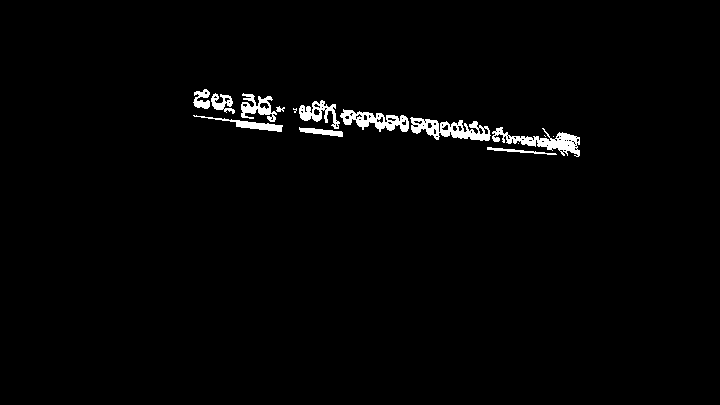

In [26]:
from PIL import Image
from IPython.display import display

rgb_image = cv2.cvtColor(words_only, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(rgb_image)

display(pil_image)

### List all files from image directory

In [11]:
import os
os.listdir('/home/akash/ws/dataset/ST/BharatST/YOLODataset/images/val/')

['F_image_161.jpg',
 'M_image_10936.jpg',
 'M_image_16500.jpg',
 'D_image_1875.jpg',
 'M_image_32287.jpeg',
 'E_image_1369.jpg',
 'D_image_126.jpg',
 'I_image_327.jpg',
 'A_image_2145.jpg',
 'C_image_2734.jpg',
 'B_image_209.jpg',
 'M_image_12373.jpg',
 'C_image_15397.jpg',
 'K_image_978.jpg',
 'D_image_1015.jpg',
 'A_image_716.jpg',
 'E_image_901.jpg',
 'F_image_355.jpg',
 'L_image_650.jpg',
 'I_image_539.jpg',
 'K_image_365.jpg',
 'I_image_479.jpg',
 'D_image_1171.jpg',
 'A_image_5184.jpg',
 'F_image_724.jpg',
 'M_image_31838.jpg',
 'F_image_601.jpg',
 'D_image_911.jpg',
 'E_image_1374.jpg',
 'K_image_1084.jpg',
 'D_image_894.jpg',
 'C_image_44519.jpg',
 'J_image_219.jpg',
 'D_image_429.jpg',
 'D_image_594.jpg',
 'I_image_126.jpg',
 'E_image_1358.jpg',
 'D_image_351.jpg',
 'B_image_321.jpg',
 'J_image_286.jpg',
 'G_image_23632.jpg',
 'F_image_590.jpg',
 'C_image_44532.png',
 'G_image_19146.jpg',
 'L_image_271.jpg',
 'I_image_201.jpg',
 'I_image_437.jpg',
 'G_image_13754.jpg',
 'D_ima